In [65]:
import cv2
import streamlit as st
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import numpy as np
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
import pandas as pd
import time
import os
import statistics
import webbrowser
import os
from dotenv import load_dotenv
import requests
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [66]:
# Load CSV file containing links for different emotions
df = pd.read_csv('data/kaggle_file.csv')


In [67]:
df.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [68]:
features = df[['danceability', 'valence', 'energy', 'tempo']]

In [69]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### SSE 
represents the sum of the squared distances between each data point and its corresponding cluster centroid. The goal of clustering algorithms is to minimize the SSE, which means that the data points within each cluster are as close as possible to their cluster centroid.
### K-value
In the K-means clustering algorithm, K is the number of clusters you want to create. The algorithm divides the dataset into K groups based on the similarity of the data points. If you choose a very low K value, the algorithm might create large clusters that don't capture the nuances in the data. On the other hand, if you choose a very high K value, the algorithm might create many small, overly specific clusters.

### Elbow Method
The Elbow Method is a technique used to determine the optimal K value for the K-means clustering algorithm. It involves calculating the SSE for different K values and plotting them. When you look at the plot, you will notice that as the K value increases, the SSE decreases. However, at a certain point (the "elbow" point), the decrease in SSE becomes less significant. 
##### The Elbow Method suggests choosing the K value at this point because it represents a balance between minimizing the SSE and avoiding too many clusters.

## Elbom Method is considered one of the best methods for clustering. You look for a change in slope from steep to shallow to determine the optimal number of clusters

c:\Users\danid\miniconda3\envs\conv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danid\miniconda3\envs\conv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danid\miniconda3\envs\conv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danid\miniconda3\envs\conv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dan

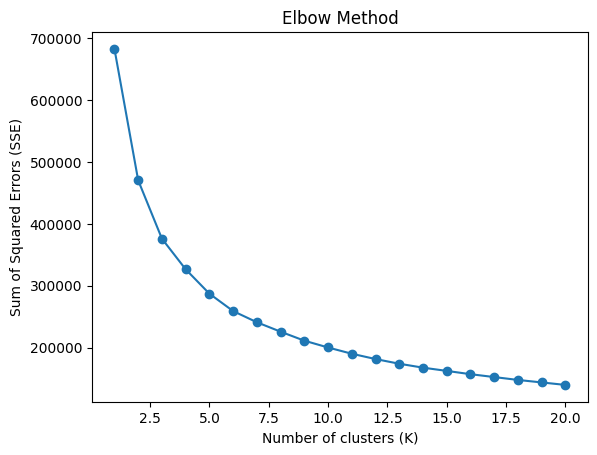

In [70]:
# Calculate the Sum of Squared Errors (SSE) for different K values
sse = []
#define a range of values to test from 1 - 10
k_values = range(1, 21)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the SSE vs K values
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

In [71]:
# Assuming K = 4 based on the elbow method
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

c:\Users\danid\miniconda3\envs\conv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [72]:
inertias = [model.inertia_ for model in kmeans]
inertias[:3]

TypeError: 'KMeans' object is not iterable

In [ ]:
df['cluster'] = kmeans.labels_


In [ ]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,2
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,2
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,2
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2


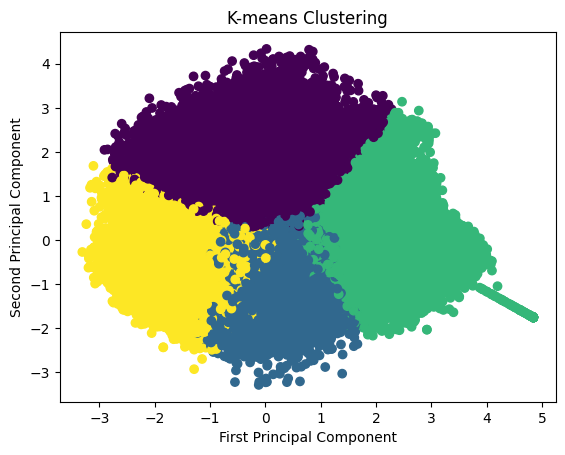

In [ ]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=4)
reduced_features = pca.fit_transform(scaled_features)

# Scatter plot of the first two principal components colored by cluster label
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering')
plt.show()


In [74]:
reduced_features[:, 0]

array([ 2.72777602, -1.142846  ,  2.44318073, ..., -1.01636336,
        0.49486366, -1.49412088])

In [ ]:
# Calculate mean values of features for each cluster
cluster_summary = df.groupby('cluster')[['danceability', 'valence', 'energy', 'tempo']].mean()
print(cluster_summary)

         danceability   valence    energy       tempo
cluster                                              
0            0.449336  0.498319  0.648869  153.547996
1            0.608810  0.534152  0.320747  105.096260
2            0.332456  0.210908  0.229596   96.564898
3            0.677256  0.763375  0.680819  114.453564


### Based on the mean values of the features, try to understand the characteristics of the songs in each cluster. For example, a cluster with high mean values for danceability, valence, and energy might represent "happy" songs.

Cluster 0 - Angry:

Danceability: 0.449 (moderate)
Valence: 0.498 (neutral)
Energy: 0.649 (high)
Tempo: 153.55 BPM (fast)
Explanation: Cluster 0 has a high energy level, a fast tempo, and neutral valence, which suggests that the songs in this cluster could be classified as angry.

Cluster 1 - Neutral:

Danceability: 0.609 (moderate to high)
Valence: 0.534 (neutral)
Energy: 0.321 (low)
Tempo: 105.10 BPM (moderate)
Explanation: Cluster 1 has low energy, moderate tempo, and neutral valence, indicating that the songs in this cluster could be classified as Neutral.

Cluster 2 - Sad:

Danceability: 0.332 (low)
Valence: 0.211 (low)
Energy: 0.230 (very low)
Tempo: 96.56 BPM (slow)
Explanation: Cluster 2 has the lowest values for danceability, valence, and energy, along with a slow tempo, which suggests that the songs in this cluster could be classified as sad.

Cluster 3 - Happy:

Danceability: 0.677 (high)
Valence: 0.763 (high)
Energy: 0.681 (high)
Tempo: 114.45 BPM (moderate)
Explanation: Cluster 3 has high values for danceability, valence, and energy, as well as a moderate tempo, indicating that the songs in this cluster could be classified as happy.

In [ ]:
# Define the cluster-to-emotion mapping based on your analysis
cluster_to_emotion = {
    0: 'angry',
    1: 'neutral',
    2: 'sad',
    3: 'happy'
}

# Map the cluster labels to emotions
df['emotion'] = df['cluster'].map(cluster_to_emotion)


In [ ]:
df.emotion.value_counts()

happy      51078
neutral    46866
angry      37733
sad        34976
Name: emotion, dtype: int64

In [75]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
# Save the updated dataset to a new CSV file
df.to_csv('songs_with_emotions.csv', index=False) 

In [ ]:
scaled_features

## Find the best parameters

In [77]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# assume that we have already preprocessed the data and selected the features to use

# define the range of hyperparameters to explore
k_range = range(2, 21)
init_methods = ['k-means++', 'random']
max_iter_range = [100, 200, 300]

# initialize variables to store the best hyperparameters and performance
best_k = None
best_init_method = None
best_max_iter = None
best_score = -1

# loop over all combinations of hyperparameters
for k in k_range:
    for init_method in init_methods:
        for max_iter in max_iter_range:
            # initialize k-means model with the hyperparameters
            kmeans = KMeans(n_clusters=k, init=init_method, max_iter=max_iter, random_state=42)

            # train the model and make predictions
            cluster_labels = kmeans.fit_predict(scaled_features)

            # evaluate the performance using Silhouette score
            score = silhouette_score(scaled_features, cluster_labels)

            # if the current model has better performance, update the best hyperparameters and performance
            if score > best_score:
                best_k = k
                best_init_method = init_method
                best_max_iter = max_iter
                best_score = score

# refit the best model using the best hyperparameters and make predictions on new data
best_kmeans = KMeans(n_clusters=best_k, init=best_init_method, max_iter=best_max_iter, random_state=42)
best_kmeans.fit(scaled_features)

print(f"Best hyperparameters: K={best_k}, Initialization method={best_init_method}, Max iterations={best_max_iter}")
print(f"Silhouette score: {best_score}")


c:\Users\danid\miniconda3\envs\conv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danid\miniconda3\envs\conv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danid\miniconda3\envs\conv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danid\miniconda3\envs\conv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dan

KeyboardInterrupt: 